In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../hopfield/')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Binary to continous

In [4]:
def binary_to_continuous(binary_data, bounds=(-1, 1)):
    """
    Convert high-dimensional binary data to 2D continuous data that is bounded by `bounds`.
    
    Args:
        binary_data (numpy.ndarray): High-dimensional binary data with shape (n_samples, n_features).
        bounds (tuple): Bounds for the continuous data. Default is (-1, 1).
    
    Returns:
        numpy.ndarray: 2D continuous data with shape (n_samples, 2).
    """
    n_samples, n_features = binary_data.shape
    
    # Generate a random rotation matrix
    rotation_matrix = np.random.rand(n_features, n_features)
    rotation_matrix, _ = np.linalg.qr(rotation_matrix)
    
    # Project the binary data onto a 2D plane
    projected_data = binary_data @ rotation_matrix[:, :2]
    
    # Rescale the projected data to the specified bounds
    min_val, max_val = np.min(projected_data), np.max(projected_data)
    scaled_data = bounds[0] + (projected_data - min_val) / (max_val - min_val) * (bounds[1] - bounds[0])
    
    return scaled_data

In [5]:
data = np.random.choice([-1, 1], size = (100, 100))

In [6]:
res = binary_to_continuous(data, bounds = (-5, 5))

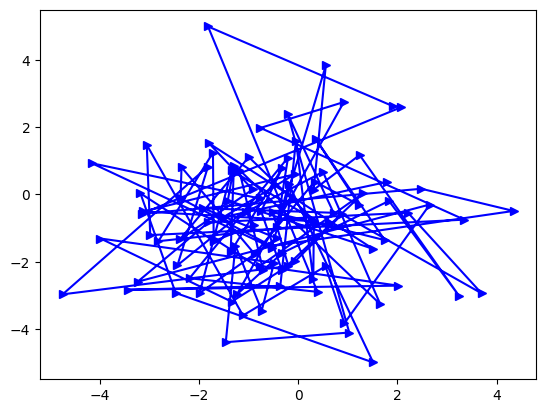

In [7]:
plt.plot(res[:, 0], res[:, 1], color = 'b', marker = '>')

### Basins of attraction

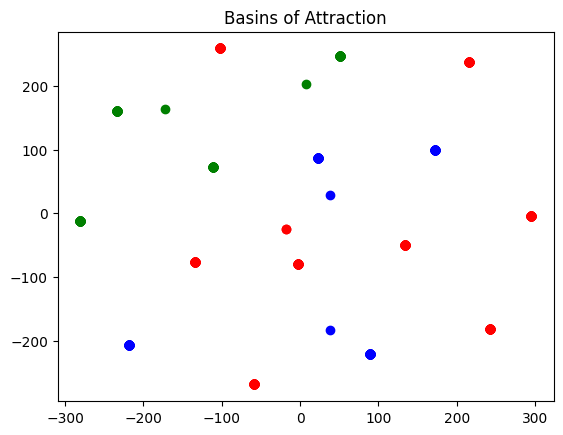

In [8]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from model import HopfieldNet

# Generate a Hopfield network with 3 attractor states
n_neurons = 4
patterns = np.array([[1, 1, -1, -1], [-1, -1, 1, 1], [1, -1, 1, -1]])
n_neurons = patterns.shape[1]
hopfield_net = HopfieldNet(n_neurons)
hopfield_net.store(patterns)

# Compute the basins of attraction
n_points = 1000
x_init = np.random.choice([-1,1], size =(n_points, n_neurons))
x_traj = np.array(hopfield_net.simulate(x_init, n_neurons*100))
state = x_traj[-1]
energy = hopfield_net.energy(state)
attractors = np.argmin(np.sum((patterns[None, ...] - state[: , None, :])**2, axis=2), axis = 1)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2)
pca = PCA(n_components=2)
x_tsne = tsne.fit_transform(x_init)
x_pca = pca.fit_transform(x_init)
# Visualize the basins of attraction
fig = plt.figure()
#ax = fig.add_subplot(projection='2d')
colors = ['r', 'g', 'b']
for i in range(3):
    indices = np.where(attractors == i)[0]
    #print(indices, x_tsne[indices])
    plt.scatter(x_tsne[indices, 0], x_tsne[indices, 1], color=colors[i])
plt.title('Basins of Attraction')
plt.show()


In [9]:
x_init.shape

(1000, 4)

In [ ]:
import plotly.graph_objects as go

import numpy as np

color = ['magenta', 'blues', 'viridis' ]
for i in range(3):
    indices = np.where(attractors == i)[0]
    x = x_tsne[indices, 0]
    y = x_tsne[indices, 1]

    fig = go.Figure(go.Histogram2dContour(
        x = x,
        y = y,
        colorscale = color[i]
    ))
    fig.show()

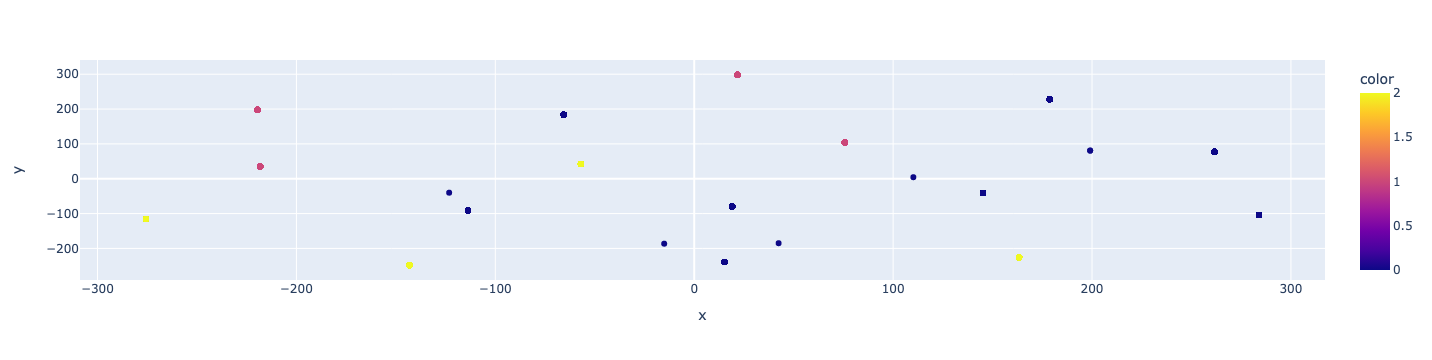

In [65]:
# x and y given as array_like objects
import plotly.express as px

df = pd.DataFrame({'x': x_tsne[:, 0], 'y': x_tsne[:, 1], 'color': attractors})
fig = px.scatter(df, 'x', 'y', color = 'color')
fig.show()

### Experiment 

#### Exp 1 - flattened

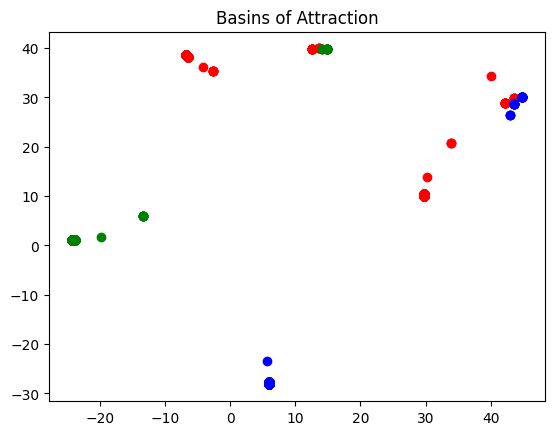

In [82]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from model import HopfieldNet

# Generate a Hopfield network with 3 attractor states
n_neurons = 10
patterns = np.array([[1, 1, -1, -1], [-1, -1, 1, 1], [1, -1, 1, -1]])
n_neurons = patterns.shape[1]
hopfield_net = HopfieldNet(n_neurons)
hopfield_net.store(patterns)

# Compute the basins of attraction
n_points = 100
n_updates = n_neurons * 30
x_init = np.random.choice([-1,1], size =(n_points, n_neurons))
x_traj = np.array(hopfield_net.simulate(x_init, n_updates))
state = x_traj[-1]
energy = hopfield_net.energy(state)
attractors = np.argmin(np.sum((patterns[None, ...] - state[: , None, :])**2, axis=2), axis = 1)
f_traj = x_traj.reshape(n_points * (n_updates + 1), n_neurons)
n_attractors = np.repeat(attractors[None, :], n_updates + 1, axis = 0).flatten()
# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2)
pca = PCA(n_components=2)
tsne.fit(x_init)
x_tsne = tsne.fit_transform(f_traj)
x_pca = pca.fit_transform(f_traj)
# Visualize the basins of attraction
fig = plt.figure()
#ax = fig.add_subplot(projection='2d')
colors = ['r', 'g', 'b']

for i in range(3):
    indices = np.where(n_attractors == i)[0]
    #print(indices, x_tsne[indices])
    plt.scatter(x_tsne[indices, 0], x_tsne[indices, 1], color=colors[i])
plt.title('Basins of Attraction')
plt.show()


#### Exp 2 - trajectory wise

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from model import HopfieldNet
from random import randint

# Generate a Hopfield network with 3 attractor states
n_neurons = 100
n_mems = 4
patterns = np.random.choice([-1, 1], size = (n_mems, n_neurons))
n_neurons = patterns.shape[1]
hopfield_net = HopfieldNet(n_neurons)
hopfield_net.store(patterns)

# Compute the basins of attraction
n_points = 10
n_updates = 2000
x_init = np.random.choice([-1,1], size = (n_points, n_neurons))
x_traj = np.array(hopfield_net.simulate(x_init, n_updates))
state = x_traj[-1]
energy = hopfield_net.energy(state)
attractors = np.argmin(np.sum((patterns[None, ...] - state[: , None, :])**2, axis=2), axis = 1)
f_traj = x_traj.reshape(n_points * (n_updates + 1), n_neurons)
n_attractors = np.repeat(attractors[None, :], n_updates + 1, axis = 0).flatten()
# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2)
pca = PCA(n_components=2)
#tsne.fit(x_init)
x_tsne = tsne.fit_transform(f_traj)
x = np.stack(np.split(x_tsne, n_updates + 1, axis = 0))
#x_pca = pca.fit_transform(f_traj)
# Visualize the basins of attraction
fig = plt.figure()
#ax = fig.add_subplot(projection='2d')
colors = [ '#%06X' % randint(0, 0xFFFFFF) for i in range(n_points) ]
markers = ['s', '>', 'o', '^', '*']
tsnes = []
for i in range(n_points):
    # for j in range(3):
    #     indices = np.where(attractors == j)[0]
    #print(indices, x_tsne[indices])
    plt.plot(x[:, i, 0], x[:, i, 1], color=colors[attractors[i]], marker = markers[i])
    plt.plot(x[-1:, i, 0], x[-1:, i, 1], color='black', marker = markers[i])
plt.title('Basins of Attraction')
plt.show()
fig = plt.figure()
for i in range(3):
    indices = np.where(n_attractors == i)[0]
    #print(indices, x_tsne[indices])
    plt.scatter(x_tsne[indices, 0], x_tsne[indices, 1], marker=markers[i % 4])
plt.title('Basins of Attraction')
plt.show()


In [5]:
res = np.stack(np.split(x_tsne, 121, axis = 0))
res.shape

ValueError: array split does not result in an equal division

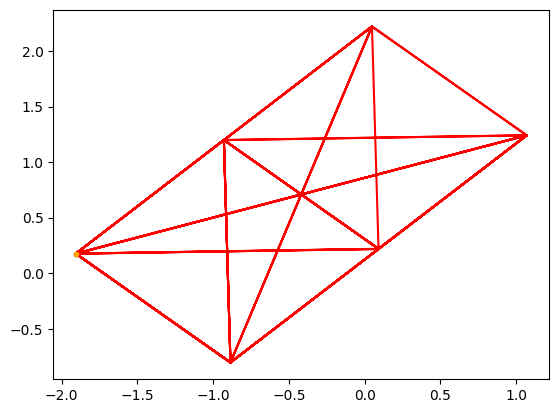

In [81]:
for i in range(1):
    indices = np.where(n_attractors == i)[0]
    #print(indices, x_tsne[indices])
    plt.plot(x_pca[indices[:1], 0], x_pca[indices[:1], 1], marker = '.', color = 'black')
    plt.plot(x_pca[indices, 0], x_pca[indices, 1], color=colors[i])
    plt.plot(x_pca[indices[-1:], 0], x_pca[indices[-1:], 1], marker = '.', color = 'orange')
plt.show()

In [76]:
from scipy.interpolate import make_interp_spline
 
X_Y_Spline = make_interp_spline(x_tsne[indices, 0], x_tsne[indices, 1])
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.title('Basins of Attraction')
plt.show()

ValueError: Expect x to not have duplicates

In [39]:
n_attractors.flatten()[:1000]

array([0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0,

In [20]:
f_traj[1], x_traj[0][1]

(array([-1,  1, -1, -1]), array([-1,  1, -1, -1]))